In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ler.rates import LeR
from ler.utils import get_param_from_json

In [2]:
import ler
import gwsnr
print(f"ler version: {ler.__version__}")
print(f"gwsnr version: {gwsnr.__version__}")

ler version: 0.3.7
gwsnr version: 0.2.4


In [3]:
ler = LeR(npool=4,
          verbose=False, 
          event_type='BNS', 
          mtot_max=51, 
          z_max=5,
          psds={'L1':'custom_psd.txt'},
          snr_type="interpolation",
          )

## Un-lensed events

In [17]:
# snr_cut=8.0
ler.selecting_n_unlensed_detectable_events(size=500, batch_size=100000,snr_threshold=8.0, output_jsonfile='n_unlensed_detectable_bns.json', meta_data_file='n_unlensed_detectable_bns_meta.json', resume=True);

collected number of detectable events =  300
collected number of detectable events =  300
total number of events =  72500000
total unlensed rate (yr^-1): 0.38732583499078327
collected number of detectable events =  301
total number of events =  72600000
total unlensed rate (yr^-1): 0.3880816360921197
collected number of detectable events =  302
total number of events =  72700000
total unlensed rate (yr^-1): 0.3888353579607152
collected number of detectable events =  303
total number of events =  72800000
total unlensed rate (yr^-1): 0.3895870091648366
collected number of detectable events =  305
total number of events =  72900000
total unlensed rate (yr^-1): 0.3916206001935846
collected number of detectable events =  305
total number of events =  73000000
total unlensed rate (yr^-1): 0.3910841336179769
collected number of detectable events =  305
total number of events =  73100000
total unlensed rate (yr^-1): 0.39054913480317804
collected number of detectable events =  307
total number

In [18]:
# let's see how rate varies with sampling size
meta_data = get_param_from_json('ler_data/n_unlensed_detectable_bns_meta.json')
meta_data.keys()

dict_keys(['events_total', 'detectable_events', 'total_rate'])

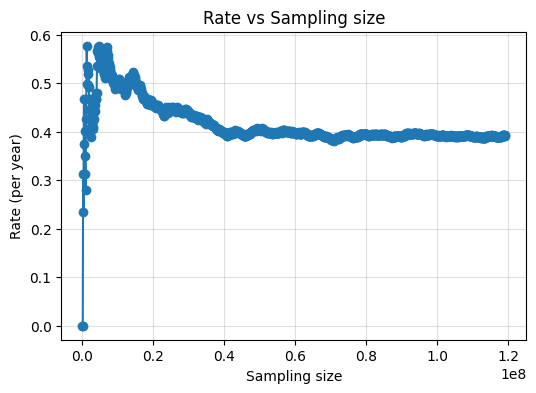

In [19]:
# plot the rate vs sampling size
plt.figure(figsize=(6,4))
plt.plot(meta_data['events_total'], meta_data['total_rate'], 'o-')
plt.xlabel('Sampling size')
plt.ylabel('Rate (per year)')
plt.title('Rate vs Sampling size')
plt.grid(alpha=0.4)
plt.show()

In [20]:
# select only events after sampling size of 
idx = np.where(meta_data['events_total'] > 0.6e8)[0]
# take average 
rate_unlensed = np.mean(meta_data['total_rate'][idx])
print('Rate (per year) =', rate_unlensed)

Rate (per year) = 0.3922295568621635


## Lensed events

In [13]:
# snr_cut=8.0
# time will take long time sample
ler.selecting_n_lensed_detectable_events(size=500, batch_size=100000,snr_threshold=8.0, num_img=1, output_jsonfile='n_lensed_detectable_bns.json', meta_data_file='n_lensed_detectable_bns_meta.json', resume=True);

collected number of detectable events =  480.0


100%|█████████████████████████████████████████████████████████████████| 5/5 [00:03<00:00,  1.52it/s]


collected number of events =  481.0
total number of events =  130900000
total lensed rate (yr^-1): 0.0007121850630357703


100%|█████████████████████████████████████████████████████| 100000/100000 [00:25<00:00, 3903.18it/s]


collected number of events =  481.0
total number of events =  131000000
total lensed rate (yr^-1): 0.0007116414103158958


100%|█████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.34s/it]


collected number of events =  481.0
total number of events =  131100000
total lensed rate (yr^-1): 0.000711098586967066


100%|█████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.63s/it]


collected number of events =  481.0
total number of events =  131200000
total lensed rate (yr^-1): 0.0007105565910928533


100%|█████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.52s/it]


collected number of events =  481.0
total number of events =  131300000
total lensed rate (yr^-1): 0.0007100154208026073


100%|█████████████████████████████████████████████████████████████████| 4/4 [00:02<00:00,  1.46it/s]


collected number of events =  482.0
total number of events =  131400000
total lensed rate (yr^-1): 0.0007109500743657191


100%|█████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.33s/it]


collected number of events =  482.0
total number of events =  131500000
total lensed rate (yr^-1): 0.0007104094279213345


100%|█████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.07it/s]


collected number of events =  482.0
total number of events =  131600000
total lensed rate (yr^-1): 0.0007098696031280812


100%|█████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  3.00s/it]


collected number of events =  482.0
total number of events =  131700000
total lensed rate (yr^-1): 0.0007093305981143165


100%|█████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.36s/it]


collected number of events =  482.0
total number of events =  131800000
total lensed rate (yr^-1): 0.0007087924110140781


100%|█████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.55s/it]


collected number of events =  482.0
total number of events =  131900000
total lensed rate (yr^-1): 0.0007082550399670621


100%|█████████████████████████████████████████████████████████████████| 4/4 [00:03<00:00,  1.31it/s]


collected number of events =  482.0
total number of events =  132000000
total lensed rate (yr^-1): 0.0007077184831186022


100%|█████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.54s/it]


collected number of events =  482.0
total number of events =  132100000
total lensed rate (yr^-1): 0.000707182738619648


100%|█████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.55s/it]


collected number of events =  483.0
total number of events =  132200000
total lensed rate (yr^-1): 0.0007081138789102015


100%|█████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.07it/s]


collected number of events =  484.0
total number of events =  132300000
total lensed rate (yr^-1): 0.0007090436115812681


100%|█████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.68s/it]


collected number of events =  484.0
total number of events =  132400000
total lensed rate (yr^-1): 0.0007085080801525813


100%|█████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.02it/s]


collected number of events =  484.0
total number of events =  132500000
total lensed rate (yr^-1): 0.0007079733570732209


100%|█████████████████████████████████████████████████████████████████| 6/6 [00:03<00:00,  1.68it/s]


collected number of events =  484.0
total number of events =  132600000
total lensed rate (yr^-1): 0.0007074394405143422


100%|█████████████████████████████████████████████████████████████████| 5/5 [00:03<00:00,  1.61it/s]


collected number of events =  484.0
total number of events =  132700000
total lensed rate (yr^-1): 0.0007069063286526132


100%|█████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.33s/it]


collected number of events =  484.0
total number of events =  132800000
total lensed rate (yr^-1): 0.000706374019670194


100%|█████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.37s/it]


collected number of events =  487.0
total number of events =  132900000
total lensed rate (yr^-1): 0.0007102175686457578


100%|█████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.32s/it]


collected number of events =  488.0
total number of events =  133000000
total lensed rate (yr^-1): 0.0007111408262653711


100%|█████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.54s/it]


collected number of events =  488.0
total number of events =  133100000
total lensed rate (yr^-1): 0.0007106065356370725


100%|█████████████████████████████████████████████████████████████████| 3/3 [00:03<00:00,  1.03s/it]


collected number of events =  488.0
total number of events =  133200000
total lensed rate (yr^-1): 0.0007100730472469546


100%|█████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.21it/s]


collected number of events =  488.0
total number of events =  133300000
total lensed rate (yr^-1): 0.00070954035928953


100%|█████████████████████████████████████████████████████| 100000/100000 [00:30<00:00, 3321.15it/s]


collected number of events =  490.0
total number of events =  133400000
total lensed rate (yr^-1): 0.0007119142423826136


100%|█████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.64s/it]


collected number of events =  490.0
total number of events =  133500000
total lensed rate (yr^-1): 0.0007113809732871959


100%|█████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.61s/it]


collected number of events =  491.0
total number of events =  133600000
total lensed rate (yr^-1): 0.0007122992137283965


100%|█████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.60s/it]


collected number of events =  491.0
total number of events =  133700000
total lensed rate (yr^-1): 0.0007117664544062362


100%|█████████████████████████████████████████████████████| 100000/100000 [00:29<00:00, 3438.43it/s]


collected number of events =  491.0
total number of events =  133800000
total lensed rate (yr^-1): 0.0007112344914358279


100%|█████████████████████████████████████████████████████████████████| 5/5 [00:03<00:00,  1.43it/s]


collected number of events =  491.0
total number of events =  133900000
total lensed rate (yr^-1): 0.0007107033230329633


100%|█████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.53s/it]


collected number of events =  491.0
total number of events =  134000000
total lensed rate (yr^-1): 0.0007101729474187596


100%|█████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.52s/it]


collected number of events =  491.0
total number of events =  134100000
total lensed rate (yr^-1): 0.0007096433628196405


100%|█████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.30s/it]


collected number of events =  491.0
total number of events =  134200000
total lensed rate (yr^-1): 0.0007091145674673158


100%|█████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.51s/it]


collected number of events =  492.0
total number of events =  134300000
total lensed rate (yr^-1): 0.0007100297094146458


100%|█████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.37s/it]


collected number of events =  492.0
total number of events =  134400000
total lensed rate (yr^-1): 0.0007095014134999028


100%|█████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.30s/it]


collected number of events =  492.0
total number of events =  134500000
total lensed rate (yr^-1): 0.0007089739031552932


100%|█████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.31s/it]


collected number of events =  493.0
total number of events =  134600000
total lensed rate (yr^-1): 0.000709887109915751


100%|█████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.31s/it]


collected number of events =  495.0
total number of events =  134700000
total lensed rate (yr^-1): 0.0007122378250572114


100%|█████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.53s/it]


collected number of events =  496.0
total number of events =  134800000
total lensed rate (yr^-1): 0.0007131472556044475


100%|█████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.09it/s]


collected number of events =  496.0
total number of events =  134900000
total lensed rate (yr^-1): 0.0007126186067863567


100%|█████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.35s/it]


collected number of events =  496.0
total number of events =  135000000
total lensed rate (yr^-1): 0.0007120907411517001


100%|█████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.08it/s]


collected number of events =  496.0
total number of events =  135100000
total lensed rate (yr^-1): 0.0007115636569613584


100%|█████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.40s/it]


collected number of events =  496.0
total number of events =  135200000
total lensed rate (yr^-1): 0.0007110373524813573


100%|█████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.32s/it]


collected number of events =  496.0
total number of events =  135300000
total lensed rate (yr^-1): 0.0007105118259828493


100%|█████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.34s/it]


collected number of events =  496.0
total number of events =  135400000
total lensed rate (yr^-1): 0.0007099870757420938


100%|█████████████████████████████████████████████████████| 100000/100000 [00:24<00:00, 4076.90it/s]


collected number of events =  496.0
total number of events =  135500000
total lensed rate (yr^-1): 0.0007094631000404392


100%|█████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.31s/it]


collected number of events =  497.0
total number of events =  135600000
total lensed rate (yr^-1): 0.0007103692114731022


100%|█████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.58s/it]


collected number of events =  497.0
total number of events =  135700000
total lensed rate (yr^-1): 0.0007098457264241169


100%|█████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.33s/it]


collected number of events =  497.0
total number of events =  135800000
total lensed rate (yr^-1): 0.0007093230123398576


100%|█████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.53s/it]


collected number of events =  497.0
total number of events =  135900000
total lensed rate (yr^-1): 0.0007088010675184155


100%|█████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.02it/s]


collected number of events =  497.0
total number of events =  136000000
total lensed rate (yr^-1): 0.0007082798902628872


100%|█████████████████████████████████████████████████████████████████| 4/4 [00:02<00:00,  1.44it/s]


collected number of events =  497.0
total number of events =  136100000
total lensed rate (yr^-1): 0.0007077594788813568


100%|█████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.11it/s]


collected number of events =  497.0
total number of events =  136200000
total lensed rate (yr^-1): 0.000707239831686877


100%|█████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.36s/it]


collected number of events =  497.0
total number of events =  136300000
total lensed rate (yr^-1): 0.0007067209469974517


100%|█████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.09it/s]


collected number of events =  497.0
total number of events =  136400000
total lensed rate (yr^-1): 0.0007062028231360166


100%|█████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.45s/it]


collected number of events =  497.0
total number of events =  136500000
total lensed rate (yr^-1): 0.0007056854584304224


100%|█████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.31s/it]


collected number of events =  497.0
total number of events =  136600000
total lensed rate (yr^-1): 0.0007051688512134162


100%|█████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.36s/it]


collected number of events =  497.0
total number of events =  136700000
total lensed rate (yr^-1): 0.0007046529998226237


100%|█████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.11it/s]


collected number of events =  497.0
total number of events =  136800000
total lensed rate (yr^-1): 0.0007041379026005312


100%|█████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.10it/s]


collected number of events =  497.0
total number of events =  136900000
total lensed rate (yr^-1): 0.0007036235578944679


100%|█████████████████████████████████████████████████████████████████| 4/4 [00:03<00:00,  1.29it/s]


collected number of events =  497.0
total number of events =  137000000
total lensed rate (yr^-1): 0.0007031099640565887


100%|█████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.55s/it]


collected number of events =  498.0
total number of events =  137100000
total lensed rate (yr^-1): 0.0007040107957405236


100%|█████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.32s/it]


collected number of events =  498.0
total number of events =  137200000
total lensed rate (yr^-1): 0.0007034976683383804


100%|█████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.11it/s]


collected number of events =  498.0
total number of events =  137300000
total lensed rate (yr^-1): 0.0007029852883905738


100%|█████████████████████████████████████████████████████████████████| 4/4 [00:02<00:00,  1.42it/s]


collected number of events =  498.0
total number of events =  137400000
total lensed rate (yr^-1): 0.0007024736542651077


100%|█████████████████████████████████████████████████████| 100000/100000 [00:24<00:00, 4065.47it/s]


collected number of events =  498.0
total number of events =  137500000
total lensed rate (yr^-1): 0.0007019627643347331


100%|█████████████████████████████████████████████████████████████████| 4/4 [00:02<00:00,  1.46it/s]


collected number of events =  499.0
total number of events =  137600000
total lensed rate (yr^-1): 0.0007028611563684517


100%|█████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.74s/it]


collected number of events =  499.0
total number of events =  137700000
total lensed rate (yr^-1): 0.0007023507270609945


100%|█████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.31s/it]


collected number of events =  499.0
total number of events =  137800000
total lensed rate (yr^-1): 0.0007018410385798182


100%|█████████████████████████████████████████████████████████████████| 8/8 [00:02<00:00,  2.89it/s]


collected number of events =  499.0
total number of events =  137900000
total lensed rate (yr^-1): 0.0007013320893132628


100%|█████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.58s/it]


collected number of events =  500.0
total number of events =  138000000
total lensed rate (yr^-1): 0.0007022283343229861
storing detectable lensed params in ./ler_data/n_lensed_detectable_bns.json

 trmming final result to size=500


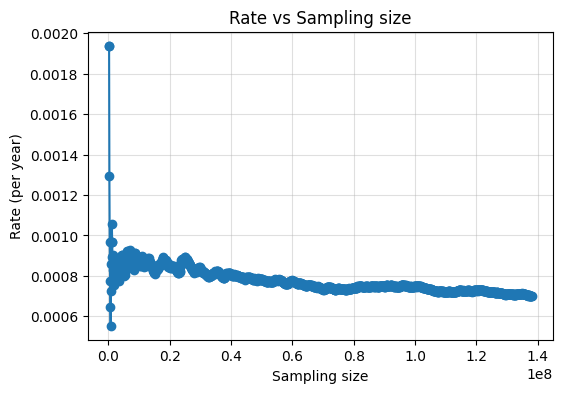

In [14]:
# let's see how rate varies with sampling size
meta_data = get_param_from_json('ler_data/n_lensed_detectable_bns_meta.json')
# plot the rate vs sampling size
plt.figure(figsize=(6,4))
plt.plot(meta_data['events_total'], meta_data['total_rate'], 'o-')
plt.xlabel('Sampling size')
plt.ylabel('Rate (per year)')
plt.title('Rate vs Sampling size')
plt.grid(alpha=0.4)
plt.show()

In [15]:
# select only events after sampling size of 
idx = np.where(meta_data['events_total'] > 0.8e8)[0]
# take average 
rate_lensed = np.mean(meta_data['total_rate'][idx])
print('Rate (per year) =', rate_lensed)

Rate (per year) = 0.000731523907162698


## rate comparison

In [21]:
rate_unlensed/rate_lensed

536.1814604029446

## mass distribution (detectable)

* detector frame

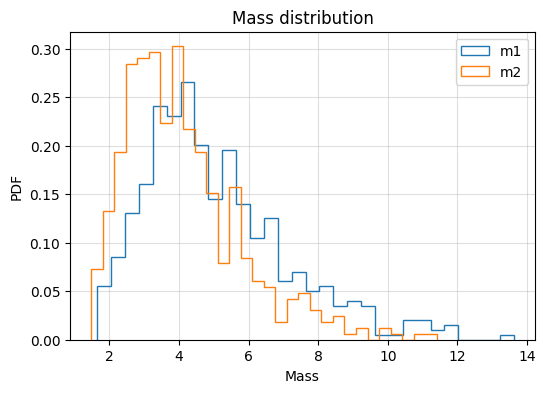

In [67]:
lensed_params = get_param_from_json('ler_data/n_lensed_detectable_bns.json')
m1 = lensed_params['mass_1']
m2 = lensed_params['mass_2']

# plot the mass distribution
plt.figure(figsize=(6,4))
plt.hist(m1, bins=30, histtype='step', label='m1', density=True)
plt.hist(m2, bins=30, histtype='step', label='m2', density=True)
plt.xlabel('Mass')
plt.ylabel('PDF')
plt.legend()
plt.title('Mass distribution')
plt.grid(alpha=0.4)
plt.show()

* source frame mass (not the inferred mass)

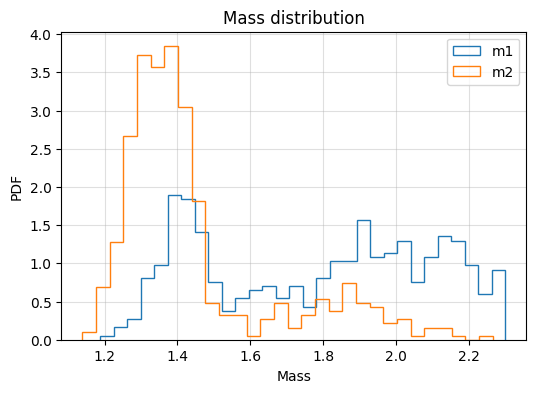

In [30]:
lensed_params = get_param_from_json('ler_data/n_lensed_detectable_bns.json')
m1 = lensed_params['mass_1_source']
m2 = lensed_params['mass_2_source']

# plot the mass distribution
plt.figure(figsize=(6,4))
plt.hist(m1, bins=30, histtype='step', label='m1', density=True)
plt.hist(m2, bins=30, histtype='step', label='m2', density=True)
plt.xlabel('Mass')
plt.ylabel('PDF')
plt.legend()
plt.title('Mass distribution')
plt.grid(alpha=0.4)
plt.show()

### Inferred mass

In [69]:
# for coversion, from luminosity distance to redshift
from astropy.cosmology import LambdaCDM
cosmo = LambdaCDM(H0=70, Om0=0.3, Ode0=0.7)
z = np.linspace(0, 10, 1000)
luminosity_distance = cosmo.luminosity_distance(z).value
from scipy.interpolate import interp1d
luminosity_distance_to_z = interp1d(luminosity_distance, z, kind='cubic', fill_value='extrapolate')

In [75]:
# detectable
lensed_params_detectable = get_param_from_json('ler_data/n_lensed_detectable_bns.json')

# detector frame masses
m1_l_det = np.array(lensed_params_detectable['mass_1'])
m2_l_det = np.array(lensed_params_detectable['mass_2'])
# chirp mass
mc_l_det = m1_l_det
mc_l_det = np.array([mc_l_det, mc_l_det, mc_l_det, mc_l_det]).T

# redshifts
zs_l_det = np.array(lensed_params_detectable['zs'])
zs_l_det = np.array([zs_l_det, zs_l_det, zs_l_det, zs_l_det]).T

# observed
dl_l_eff_det = np.array(lensed_params_detectable['effective_luminosity_distance'])
zs_l_eff_det = luminosity_distance_to_z(dl_l_eff_det)
mc_l_eff_det = mc_l_det/(1+zs_l_eff_det)

In [76]:
# avoid nan
zs_l_eff_det = zs_l_eff_det.flatten()
mc_l_eff_det = mc_l_eff_det.flatten()
zs_l_det = zs_l_det.flatten()
idx_nan = np.isnan(zs_l_eff_det)
zs_l_eff_det = zs_l_eff_det[~idx_nan]
mc_l_eff_det = mc_l_eff_det[~idx_nan]
zs_l_det = zs_l_det[~idx_nan]

# choose only detectable
snr_l_det = np.array(lensed_params_detectable['optimal_snr_net']).flatten()
snr_l_det = snr_l_det[~idx_nan]
idx_detectable = snr_l_det > 8
zs_l_eff_det = zs_l_eff_det[idx_detectable]
mc_l_eff_det = mc_l_eff_det[idx_detectable]
zs_l_det = zs_l_det[idx_detectable]

INFO:matplotlib.mathtext:Substituting symbol M from STIXNonUnicode
INFO:matplotlib.mathtext:Substituting symbol M from STIXNonUnicode
INFO:matplotlib.mathtext:Substituting symbol M from STIXNonUnicode
INFO:matplotlib.mathtext:Substituting symbol M from STIXNonUnicode


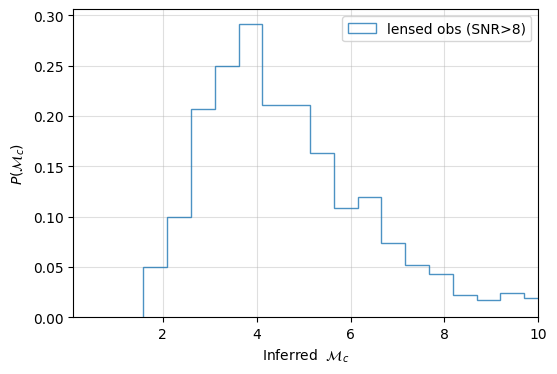

In [77]:
plt.figure(figsize=(6, 4))
plt.hist(mc_l_eff_det, bins=20, alpha=0.8, label='lensed obs (SNR>8)', density=True, histtype='step')
#plt.hist(mc_l_eff_det_sub, bins=20, alpha=0.8, label='lensed obs (SNR>6)', density=True, histtype='step')
plt.xlabel(r'Inferred  $\mathcal{M}_c$')
plt.ylabel(r'$P(\mathcal{M}_c)$')
plt.legend()
plt.grid(alpha=0.4)
plt.xlim(0.1, 10)
# plt.yscale('log')
# plt.xscale('log')
plt.show()

In [74]:
# calculate chirpmass with m1 and m2
m1 = 3.6
m2 = 1.4
(m1*m2)**(3/5)/(m1+m2)**(1/5)

1.9127769118804565

## effective redshift

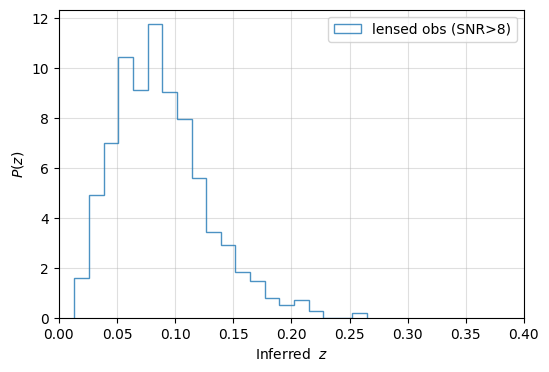

In [79]:
# plot zs_l_eff_det
plt.figure(figsize=(6, 4))
plt.hist(zs_l_eff_det, bins=20, alpha=0.8, label='lensed obs (SNR>8)', density=True, histtype='step')
plt.xlabel(r'Inferred  $z$')
plt.ylabel(r'$P(z)$')
plt.legend()
plt.grid(alpha=0.4)
plt.xlim(0, 0.4)
# plt.yscale('log')
# plt.xscale('log')
plt.show()

## Magnification

In [17]:
# getting data from json
lensed_params_detectable = get_param_from_json("ler_data/n_lensed_detectable_bns.json")

snr_l = lensed_params_detectable['optimal_snr_net'].flatten()
mu = lensed_params_detectable['magnifications'].flatten()
mu_arr = abs(mu[np.where(snr_l>8)[0]])

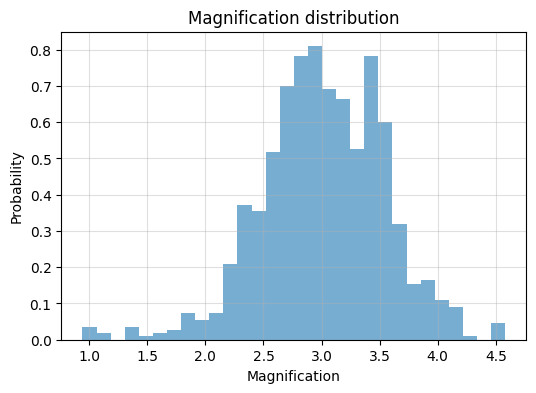

In [18]:
# plot histogram
plt.figure(figsize=(6,4))
plt.hist(np.log10(mu_arr), bins=30, alpha=0.6, density=True)
plt.xlabel('Magnification')
plt.ylabel('Probability')
plt.title('Magnification distribution')
plt.grid(alpha=0.4)
plt.show()

## Changing mass model

In [8]:
ler = LeR(verbose=False,)

In [9]:
ler.available_gw_prior_list_and_its_params

{'merger_rate_density': {'merger_rate_density_bbh_popI_II_oguri2018': {'R0': 2.39e-08,
   'b2': 1.6,
   'b3': 2.0,
   'b4': 30},
  'star_formation_rate_madau_dickinson2014': {'af': 2.7, 'bf': 5.6, 'cf': 2.9},
  'merger_rate_density_bbh_popIII_ken2022': {'n0': 1.92e-08,
   'aIII': 0.66,
   'bIII': 0.3,
   'zIII': 11.6},
  'merger_rate_density_bbh_primordial_ken2022': {'n0': 4.4e-11,
   't0': 13.786885302009708}},
 'source_frame_masses': {'binary_masses_BBH_popI_II_powerlaw_gaussian': {'mminbh': 4.98,
   'mmaxbh': 112.5,
   'alpha': 3.78,
   'mu_g': 32.27,
   'sigma_g': 3.88,
   'lambda_peak': 0.03,
   'delta_m': 4.8,
   'beta': 0.81},
  'binary_masses_BBH_popIII_lognormal': {'Mc': 30.0,
   'sigma': 0.3,
   'beta': 1.1},
  'binary_masses_BBH_primordial_lognormal': {'Mc': 30.0,
   'sigma': 0.3,
   'beta': 1.1},
  'binary_masses_BNS_gwcosmo': {'mminns': 1.0, 'mmaxns': 3.0, 'alphans': 0.0},
  'binary_masses_BNS_bimodal': {'w': 0.643,
   'muL': 1.352,
   'sigmaL': 0.08,
   'muR': 1.88,
   's

In [59]:

# max possible detector frame mass mtot_max*(1+z_max)
ler = LeR(npool=6,
          verbose=False, 
          event_type='BNS',
          source_priors=dict(
              source_frame_masses='binary_masses_BNS_gwcosmo',
              ),
          source_priors_params=dict(
              source_frame_masses={'mminns': 1.0, 'mmaxns': 3.0, 'alphans': 0.0}
              ),
          mtot_max=30,
          z_max=4,
          psds={'L1':'custom_psd.txt'},
          snr_type="interpolation",
          )

In [63]:
# snr_cut=8.0
# time will take long time sample
ler.selecting_n_lensed_detectable_events(size=500, batch_size=100000,snr_threshold=8.0, num_img=1, output_jsonfile='n_lensed_detectable_bns_gwcosmo.json', meta_data_file='n_lensed_detectable_bns_meta_gwcosmo.json', resume=True);

collected number of detectable events =  47.0


100%|█████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.05it/s]


collected number of events =  49.0
total number of events =  4800000
total lensed rate (yr^-1): 0.0015690377275031644


100%|█████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.61s/it]


collected number of events =  49.0
total number of events =  4900000
total lensed rate (yr^-1): 0.0015370165493908548


100%|█████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.08it/s]


collected number of events =  50.0
total number of events =  5000000
total lensed rate (yr^-1): 0.0015370165493908548


100%|█████████████████████████████████████████████████████████████████| 4/4 [00:02<00:00,  1.43it/s]


collected number of events =  50.0
total number of events =  5100000
total lensed rate (yr^-1): 0.0015068789699910342


100%|█████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.04it/s]


collected number of events =  50.0
total number of events =  5200000
total lensed rate (yr^-1): 0.0014779005282604374


100%|█████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.10it/s]


collected number of events =  51.0
total number of events =  5300000
total lensed rate (yr^-1): 0.0014790159248855397


100%|█████████████████████████████████████████████████████████████████| 5/5 [00:02<00:00,  1.79it/s]


collected number of events =  53.0
total number of events =  5400000
total lensed rate (yr^-1): 0.0015085532799576909


100%|█████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.69s/it]


collected number of events =  54.0
total number of events =  5500000
total lensed rate (yr^-1): 0.0015090707939473848


100%|█████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.67s/it]


collected number of events =  55.0
total number of events =  5600000
total lensed rate (yr^-1): 0.00150956982529459


100%|█████████████████████████████████████████████████████████████████| 4/4 [00:02<00:00,  1.44it/s]


collected number of events =  57.0
total number of events =  5700000
total lensed rate (yr^-1): 0.001537016549390855


100%|█████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.88s/it]


collected number of events =  60.0
total number of events =  5800000
total lensed rate (yr^-1): 0.001590017120059505


100%|█████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.10it/s]


collected number of events =  60.0
total number of events =  5900000
total lensed rate (yr^-1): 0.0015630676773466321


100%|█████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.10it/s]


collected number of events =  61.0
total number of events =  6000000
total lensed rate (yr^-1): 0.0015626334918807027


100%|█████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.31s/it]


collected number of events =  63.0
total number of events =  6100000
total lensed rate (yr^-1): 0.001587410534616785


100%|█████████████████████████████████████████████████████████████████| 4/4 [00:02<00:00,  1.44it/s]


collected number of events =  63.0
total number of events =  6200000
total lensed rate (yr^-1): 0.0015618071388971593


100%|█████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.54s/it]


collected number of events =  64.0
total number of events =  6300000
total lensed rate (yr^-1): 0.001561413637476424


100%|█████████████████████████████████████████████████████| 100000/100000 [00:24<00:00, 4075.24it/s]


collected number of events =  65.0
total number of events =  6400000
total lensed rate (yr^-1): 0.001561032432975087


100%|█████████████████████████████████████████████████████████████████| 8/8 [00:02<00:00,  2.93it/s]


collected number of events =  65.0
total number of events =  6500000
total lensed rate (yr^-1): 0.0015370165493908548


100%|█████████████████████████████████████████████████████████████████| 4/4 [00:02<00:00,  1.35it/s]


collected number of events =  67.0
total number of events =  6600000
total lensed rate (yr^-1): 0.00156030467892708


100%|█████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.66s/it]


collected number of events =  69.0
total number of events =  6700000
total lensed rate (yr^-1): 0.0015828976404174476


100%|█████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.09it/s]


collected number of events =  70.0
total number of events =  6800000
total lensed rate (yr^-1): 0.001582222918490586


100%|█████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.37s/it]


collected number of events =  72.0
total number of events =  6900000
total lensed rate (yr^-1): 0.0016038433558861096


100%|█████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.58s/it]


collected number of events =  72.0
total number of events =  7000000
total lensed rate (yr^-1): 0.0015809313079448795


100%|█████████████████████████████████████████████████████████████████| 3/3 [00:03<00:00,  1.01s/it]


collected number of events =  73.0
total number of events =  7100000
total lensed rate (yr^-1): 0.0015803127902187662


100%|█████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.54s/it]


collected number of events =  74.0
total number of events =  7200000
total lensed rate (yr^-1): 0.001579711453540601


100%|█████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.32s/it]


collected number of events =  74.0
total number of events =  7300000
total lensed rate (yr^-1): 0.0015580715706153873


100%|█████████████████████████████████████████████████████████████████| 5/5 [00:03<00:00,  1.65it/s]


collected number of events =  75.0
total number of events =  7400000
total lensed rate (yr^-1): 0.0015577870433015422


100%|█████████████████████████████████████████████████████████████████| 4/4 [00:02<00:00,  1.38it/s]


collected number of events =  76.0
total number of events =  7500000
total lensed rate (yr^-1): 0.0015575101033827332


KeyboardInterrupt: 

In [64]:
# getting data from json
lensed_params_detectable = get_param_from_json("ler_data/n_lensed_detectable_bns_gwcosmo.json")

snr_l = lensed_params_detectable['optimal_snr_net'].flatten()
mu = lensed_params_detectable['magnifications'].flatten()
mu_arr = abs(mu[np.where(snr_l>8)[0]])

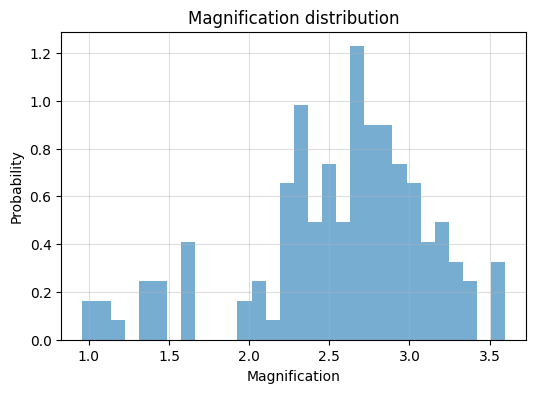

In [65]:
# plot histogram
plt.figure(figsize=(6,4))
plt.hist(np.log10(mu_arr), bins=30, alpha=0.6, density=True)
plt.xlabel('Magnification')
plt.ylabel('Probability')
plt.title('Magnification distribution')
plt.grid(alpha=0.4)
plt.show()

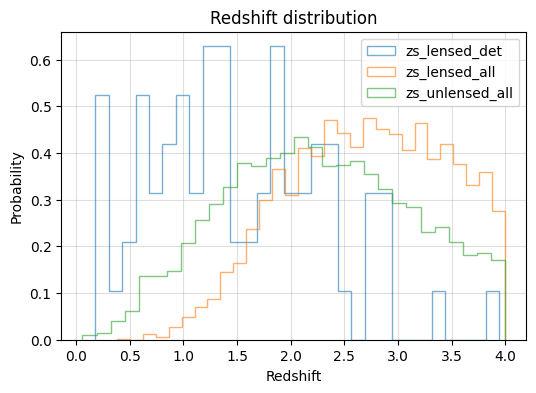

In [66]:
zs = lensed_params_detectable['zs']
zs_lensed = ler.sample_source_redshift_sl(size=5000)
zs_unlensed = ler.sample_source_redshift(size=5000)
# plot
plt.figure(figsize=(6,4))
plt.hist(zs, bins=30, alpha=0.6, density=True, histtype='step', label='zs_lensed_det')
plt.hist(zs_lensed, bins=30, alpha=0.6, density=True, histtype='step', label='zs_lensed_all')
plt.hist(zs_unlensed, bins=30, alpha=0.6, density=True, histtype='step', label='zs_unlensed_all')
plt.xlabel('Redshift')
plt.ylabel('Probability')
plt.title('Redshift distribution')
plt.grid(alpha=0.4)
plt.legend()
plt.show()

### Checking possible magnification

* If the common BNS mass is 1.4, and it comes from z=3, what should be the magnification to be under the detector horizon?

In [47]:
# convert redshift to luminosity distance with astropy
from astropy.cosmology import Planck18
from astropy import units as u

zs=3
Planck18.luminosity_distance(zs).to(u.Mpc).value

26016.015955798568

In [36]:
from gwsnr import GWSNR

gwsnr = GWSNR(mtot_max=51, 
          psds={'L1':'custom_psd.txt'},
          snr_type="interpolation",)

npool:  4
snr type:  interpolation
waveform approximant:  IMRPhenomD
sampling frequency:  2048.0
minimum frequency (fmin):  20.0
mtot=mass1+mass2
min(mtot):  2.0
max(mtot) (with the given fmin=20.0): 51
detectors:  None
min(ratio):  0.1
max(ratio):  1.0
mtot resolution:  500
ratio resolution:  50
interpolator directory:  ./interpolator_pickle
Interpolator will be loaded for L1 detector from ./interpolator_pickle/L1/partialSNR_dict_1.pickle


In [46]:
gwsnr.detector_horizon(mass_1=np.array([1.4,]), mass_2=np.array([1.4,]), snr_th=8.0, snr_th_net=8)

100%|█████████████████████████████████████████████████████████████████| 1/1 [00:03<00:00,  3.12s/it]


{'L1': array([319.89599661]), 'net': array([319.89599661])}

In [52]:
# luminoisty distance to redshift
ler.Dl_to_z(np.array([320]))

array([0.07091793])

* Let $D_l^{eff}=320\text{Mpc}$

In [50]:
zs=3
Dl=Planck18.luminosity_distance(zs).to(u.Mpc).value
Dl_eff=320
mu = (Dl/Dl_eff)**2
print('mu =', mu)

mu = 6609.698107542633


In [53]:
# GW230529
gwsnr.detector_horizon(mass_1=np.array([3.6,]), mass_2=np.array([1.4,]), snr_th=8.0, snr_th_net=8)

100%|█████████████████████████████████████████████████████████████████| 1/1 [00:03<00:00,  3.50s/it]


{'L1': array([454.0485148]), 'net': array([454.0485148])}

In [54]:
# luminoisty distance to redshift
ler.Dl_to_z(np.array([454.]))

array([0.09871636])

In [56]:
zs=2
Dl=Planck18.luminosity_distance(zs).to(u.Mpc).value
Dl_eff=454
mu = (Dl/Dl_eff)**2
print('mu =', mu)

mu = 1230.3354569423766
